In [1]:
import cvxpy as cp
import numpy as np
from scipy.spatial import distance_matrix

np.random.seed(2)

In [2]:
# Data
n = 6 # locations
m = 8 # clients

# Generate random locations and clients
# with costs
loc = np.random.uniform(-10, 10, size=(n+m, 2))
dist = distance_matrix(loc, loc)
d = dist[n:, :n]

# Generate random location costs
c = np.random.rand(n)

In [3]:
# Formulate CVXPY problem
x = cp.Variable((m, n), boolean=True)
y = cp.Variable(n, boolean=True)

# Objective. Note that second product
# is elementwise between two m x n matrices.
# Then we sum over all the components
objective = cp.Minimize(c @ y + cp.sum(cp.multiply(x, d)))

constraints = [cp.sum(x, axis=1) == 1]
for j in range(n):
    constraints += [x[:, j] <= y[j]]
    
problem = cp.Problem(objective, constraints)
problem.solve(solver=cp.SCIPY)

28.566091665403377

In [4]:
print("y = ", y.value)
print("x = \n", x.value)

y =  [1. 0. 0. 1. 1. 1.]
x = 
 [[0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]]


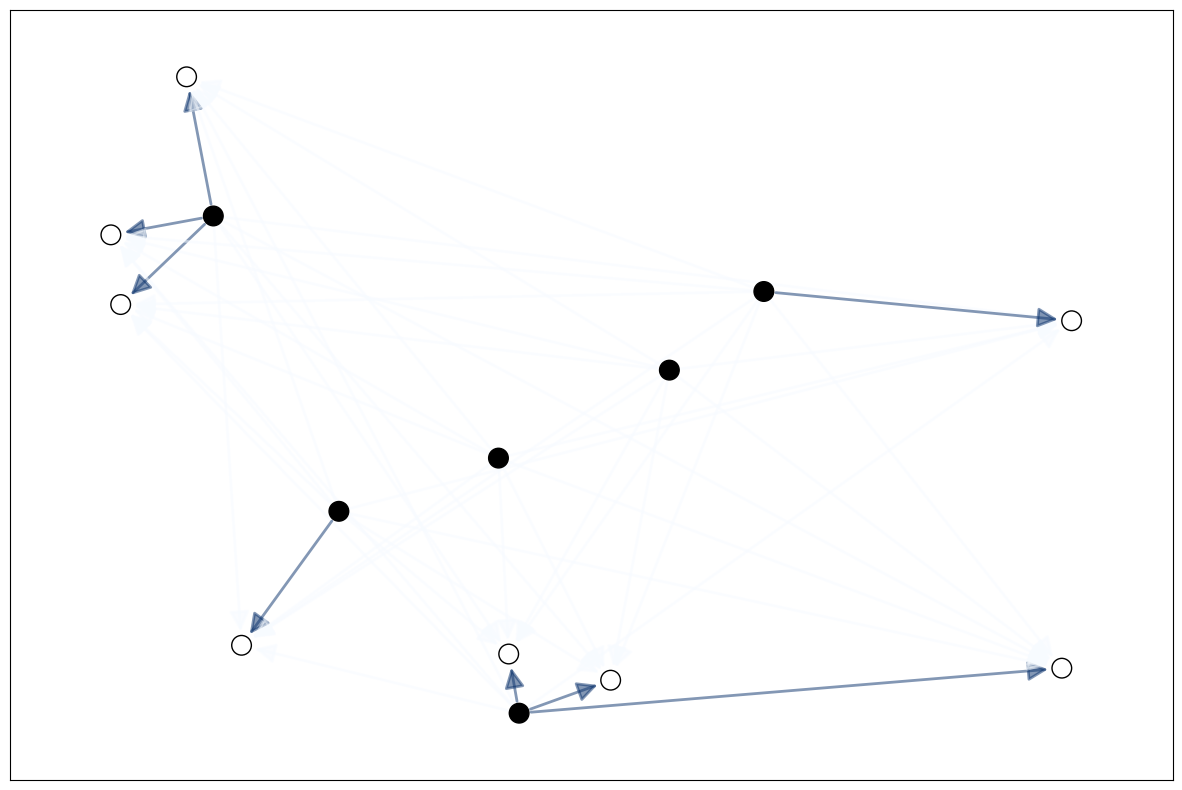

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

# Create graph
G = nx.DiGraph()
G.add_nodes_from(range(n + m))
for i in range(m):
    for j in range(n):
        G.add_edge(j, n + i)

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
cmap = plt.cm.Blues

# Node positions in 2d plot
layout = {i:s for i, s in enumerate(loc)
         }
nx.draw_networkx_nodes(G, layout, node_color=n * ['k'] + m * ['w'], edgecolors='k', node_size=200)

# Draw edges
nx.draw_networkx_edges(G, layout, edge_cmap=cmap, edge_color=x.value.flatten(order='F'), 
                       width=2, alpha=0.5, arrowsize=30, min_target_margin=10)

plt.show()